In [1]:
import os
os.chdir("../../")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import surgeon

Using TensorFlow backend.
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohsen/miniconda3/envs/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohsen/miniconda3

In [23]:
sns.set(style="whitegrid")

In [76]:
data_name = "pancreas"
data_type = "normalized"

# scNet scores

In [77]:
scnet_scratch = pd.read_csv(f"./results/convergence/{data_name}/scores_scratch_scNet_{data_type}.log")
scnet_scratch['Architecture'] = "Scratch trVAE"
scnet_scratch.head()

,epoch,time,ASW,ARI,NMI,EBM,KNN,Architecture
0,0,1.557409,0.021871,0.061813,0.109159,0.653231,0.304926,Scratch trVAE
1,5,1.779715,0.010917,0.205893,0.361370,0.651883,0.524624,Scratch trVAE
2,10,2.095926,0.012117,0.376593,0.457868,0.652503,0.603468,Scratch trVAE
3,15,2.340391,0.012130,0.430348,0.561422,0.652654,0.655138,Scratch trVAE
4,20,2.522776,0.011840,0.463460,0.578342,0.653321,0.692739,Scratch trVAE


In [93]:
scnet_freezed0 = pd.read_csv(f"./results/convergence/{data_name}/scores_scNet_freeze_level=0_{data_type}.log")
scnet_freezed0['Architecture'] = "Freeze Level = 0 trVAE"
scnet_freezed0.head()

,epoch,time,ASW,ARI,NMI,EBM,KNN,Architecture
0,0.0,2.089148,0.011571,0.445923,0.557449,0.651556,0.811329,Freeze Level = 0 trVAE
1,5.0,2.343967,0.004427,0.437047,0.548490,0.653073,0.813403,Freeze Level = 0 trVAE
2,10.0,2.563544,0.004350,0.429342,0.537904,0.655350,0.811749,Freeze Level = 0 trVAE
3,15.0,2.817736,0.003685,0.404133,0.514342,0.656212,0.810862,Freeze Level = 0 trVAE
4,20.0,3.038161,0.003700,0.368998,0.495412,0.652331,0.807927,Freeze Level = 0 trVAE


In [94]:
scnet_freezed1 = pd.read_csv(f"./results/convergence/{data_name}/scores_scNet_freeze_level=1_{data_type}.log")
scnet_freezed1['Architecture'] = "Freeze Level = 1 trVAE"
scnet_freezed1.head()

,epoch,time,ASW,ARI,NMI,EBM,KNN,Architecture
0,0.0,2.292195,0.016025,0.472822,0.583332,0.655660,0.812453,Freeze Level = 1 trVAE
1,5.0,2.508139,0.004740,0.461664,0.571332,0.653293,0.816012,Freeze Level = 1 trVAE
2,10.0,2.710360,0.004877,0.460513,0.582563,0.651645,0.817766,Freeze Level = 1 trVAE
3,15.0,2.930713,0.004337,0.457170,0.580426,0.655886,0.817546,Freeze Level = 1 trVAE
4,20.0,3.185318,0.004108,0.457285,0.582000,0.652532,0.817576,Freeze Level = 1 trVAE


In [95]:
scnet_freezed2 = pd.read_csv(f"./results/convergence/{data_name}/scores_scNet_freeze_level=2_{data_type}.log")
scnet_freezed2['Architecture'] = "Freeze Level = 2 trVAE"
scnet_freezed2 = scnet_freezed2.iloc[:300, :]
scnet_freezed2.head()

,epoch,time,ASW,ARI,NMI,EBM,KNN,Architecture
0,0.0,2.795226,0.023372,0.468668,0.583469,0.653856,0.812891,Freeze Level = 2 trVAE
1,5.0,3.021366,0.022365,0.471393,0.585392,0.653605,0.812769,Freeze Level = 2 trVAE
2,10.0,3.259291,0.021209,0.471827,0.585278,0.649798,0.813169,Freeze Level = 2 trVAE
3,15.0,3.491016,0.019991,0.470071,0.585404,0.655055,0.813515,Freeze Level = 2 trVAE
4,20.0,3.713499,0.018841,0.472466,0.585582,0.652157,0.812973,Freeze Level = 2 trVAE


# scVI scores

In [96]:
scvi_scores = pd.read_csv(f"./results/convergence/{data_name}/scVI.csv")
scvi_scores['Architecture'] = "scVI"
scvi_scores['time'] = scvi_scores['Elapsed Time']
# scvi_scores['EBM'] = scvi_scores['EBM_15']
# scvi_scores['KNN'] = scvi_scores['KNN_15']
scvi_scores.head()

,Epoch,Elapsed Time,ASW,NMI,ARI,EBM,Architecture,time
0,0,0.239450,0.177513,0.519307,0.340207,0.155622,scVI,0.239450
1,5,1.177571,0.142946,0.504384,0.390529,0.214726,scVI,1.177571
2,10,2.113883,0.155876,0.561422,0.467055,0.054375,scVI,2.113883
3,15,3.050318,0.161110,0.605814,0.520119,0.065726,scVI,3.050318
4,20,3.987715,0.153524,0.614673,0.516823,0.079574,scVI,3.987715


# Integrate scores

In [97]:
df = pd.concat([scnet_scratch,
                scnet_freezed0,
                scnet_freezed1,
                scnet_freezed2,
                scvi_scores])
df.head()

/home/mohsen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,ARI,ASW,Architecture,EBM,Elapsed Time,Epoch,KNN,NMI,epoch,time
0,0.061813,0.021871,Scratch trVAE,0.653231,NaN,NaN,0.304926,0.109159,0.0,1.557409
1,0.205893,0.010917,Scratch trVAE,0.651883,NaN,NaN,0.524624,0.361370,5.0,1.779715
2,0.376593,0.012117,Scratch trVAE,0.652503,NaN,NaN,0.603468,0.457868,10.0,2.095926
3,0.430348,0.012130,Scratch trVAE,0.652654,NaN,NaN,0.655138,0.561422,15.0,2.340391
4,0.463460,0.011840,Scratch trVAE,0.653321,NaN,NaN,0.692739,0.578342,20.0,2.522776


# Convergence plot 

In [98]:
sns.set()

In [99]:
import matplotlib
font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=22)
matplotlib.rc('xtick', labelsize=22)

In [100]:
metrics = ["KNN", "EBM"]

<Figure size 864x576 with 0 Axes>

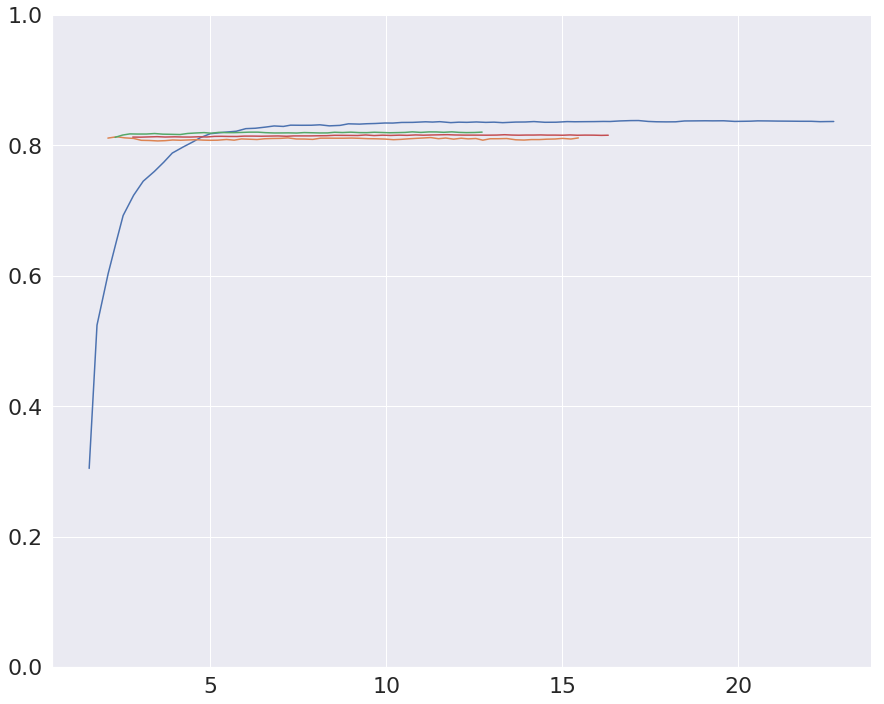

<Figure size 864x576 with 0 Axes>

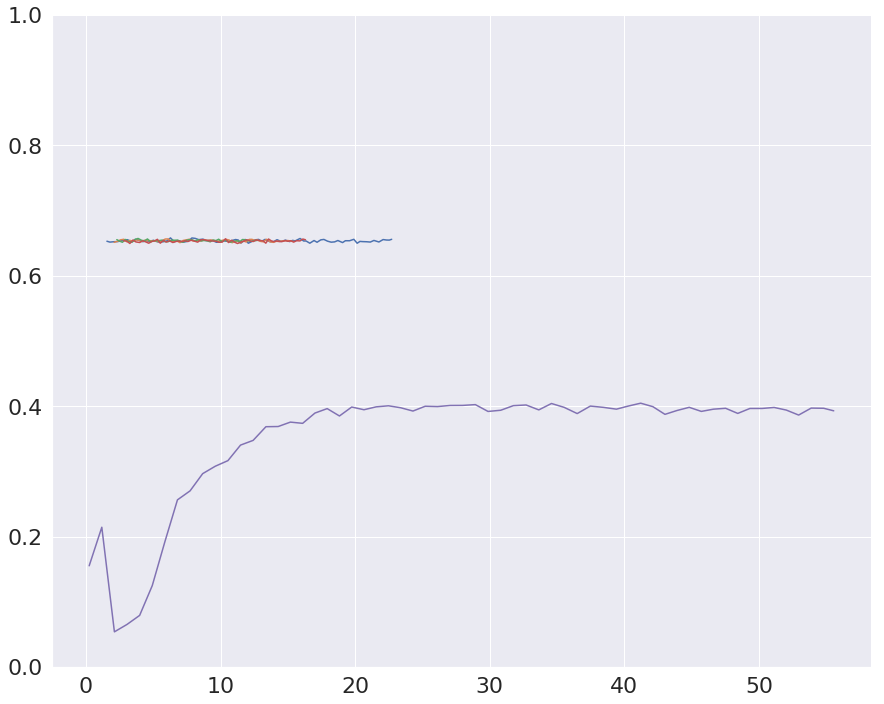

In [101]:
for metric in metrics:
    plt.close("all")
    plt.figure(figsize=(12, 8))
    g = sns.relplot(x="time", y=metric,
                    hue="Architecture", 
                    sizes=[1000, 10, 10],
                    legend=False,
                    height=10, aspect=1.25,
                    kind="line", data=df)
    plt.xlabel("")
    plt.ylabel("")
    plt.ylim(0, 1)
#     g.despine(left=True)
#     plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
    plt.tight_layout()
#     plt.title(metric)
#     plt.legend()
    plt.savefig(f"./results/convergence/{data_name}/{metric}.pdf", dpi=300)
    plt.show()